# Introduction

Ahoy there, matey! Welcome aboard this Titanic dataset adventure! In this notebook, we'll be exploring the infamous Titanic tragedy and using data science to predict which passengers survived the disaster. But don't worry, we'll keep it light-hearted and fun, just like Jack and Rose's whirlwind romance (minus the tragic ending, of course).

The Titanic dataset contains information on 891 passengers who were on board the ship, including their age, gender, ticket class, and whether they survived or not. Our goal is to use this data to build a model that can predict which passengers are likely to survive based on their characteristics.

## 1. Import data and python packages

## 2. Assess Data Quality & Missing Values

### 2.1. Final Adjustments to Data

#### 2.1.1 Additional Variables

## 3. Exploratory Data Analysis

### 3.1. Final Adjustments to Data

### 3.2. Final Adjustments to Data

### 3.3. Final Adjustments to Data

### 3.4. Final Adjustments to Data

### 3.5. Final Adjustments to Data

### 3.6. Final Adjustments to Data

## 4. Logistic Regression and Results

### 4.1. Model evaluation based on simple train/test split using ```train_test_split()``` function

### 4.2. Feature selection

### 4.3. Review of model evaluation procedures

## 5. Summarize

But before we start building our model, we'll need to do some exploration and visualization of the data. We'll be using Python libraries such as Pandas, Numpy, Seaborn, and Scikit-learn to help us with this. And don't worry if you're new to data science, we'll explain everything step-by-step and make it easy to follow along.

In this notebook, we'll be working through these steps to build a model that can predict which passengers are likely to survive based on their characteristics. So grab your life jacket and let's set sail on this Titanic dataset adventure!

## 1. Import data and python packages
In this section, we import the necessary Python packages and libraries that will be used throughout the notebook, including Pandas, Numpy, Matplotlib, Seaborn, Scikit-learn, and Pickle. These libraries provide a range of tools for data manipulation, visualization, and modeling, while Logistic Regression and Recursive Feature Elimination are used for building our predictive model. We also set up the visualization style to have a white background and color-coded grids for easier readability. Furthermore, we suppress any warning messages that may appear during the execution of the code to ensure a cleaner output. By importing these packages and libraries, we can perform various data analysis tasks and build a robust predictive model for the Titanic dataset.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
plt.rc("font", size=14)
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
import pickle

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
833,834,0,3,"Augustsson, Mr. Albert",male,23.0,0,0,347468,7.8542,NaN,S
535,536,1,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.2500,NaN,S
187,188,1,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,45.0,0,0,111428,26.5500,NaN,S
53,54,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,2926,26.0000,NaN,S
800,801,0,2,"Ponesell, Mr. Martin",male,34.0,0,0,250647,13.0000,NaN,S


In [3]:
print('Shape of Training Data:',train.shape,'Shape of Testing Data',test.shape)

Shape of Training Data: (891, 12) Shape of Testing Data (418, 11)


## 2. Data Assessment and Summary Statistics
This part of the code performs data exploration and generates summary statistics for the train dataset using the `info()` and `describe()` methods of the Pandas library. The `info()` method provides information on the dataset's columns, including the data type and the number of non-null values, while the `describe()` method generates summary statistics for the numeric columns, including count, mean, standard deviation, minimum, and maximum values. The `isnull()` method of the Pandas library is used to check for missing values in the dataset. The `sum()` method is then applied to the resulting Boolean DataFrame to count the number of missing values in each column. This information is useful for determining whether missing values need to be imputed or if certain columns can be dropped from the dataset. These methods are useful for gaining a better understanding of the dataset's structure and identifying any potential issues, such as missing values or outliers.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### 2.1. Exploratory Data Analysis and feature engineering
Sure, here's an example of a title and a description for this part of the code:
This part of the code performs data visualization and feature engineering for the train dataset. First, a histogram and density plot are created for the 'Age' column using the Matplotlib and Seaborn libraries. The `fillna()` method of the Pandas library is then used to replace missing age values with the median age. The `fillna()` method is also used to replace missing 'Embarked' values with the mode value. The `drop()` method is used to remove the 'PassengerId', 'Name', 'Cabin', and 'Ticket' columns from the dataset, as they are unlikely to be useful for modeling. The `replace()` method is used to recode the 'Sex' and 'Embarked' columns as numeric values.

Next, a grouped histogram and density plot are created for the 'Age' column, comparing the original and adjusted age distributions. The Seaborn `pairplot()` function is then used to create a scatterplot matrix for the remaining columns in the dataset, allowing for visual inspection of their pairwise relationships. Finally, a heatmap is created using the Seaborn `heatmap()` function to visualize the correlation between the remaining columns in the dataset.

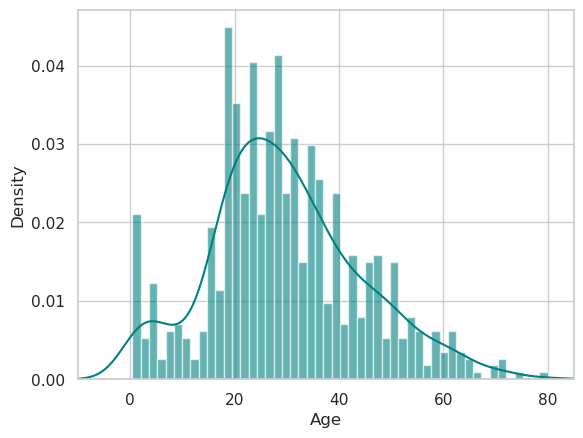

In [8]:
# Plot a histogram and density plot of the 'Age' variable
ax = train["Age"].hist(bins=50, density=True, stacked=True, color='teal', alpha=0.6)
train["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [9]:
def extract_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'

# Mapping of titles
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
        
def preprocess_data(df):
    # Extract Title
    df['Title'] = df['Name'].apply(extract_title)
    # Replace rare titles with 'Rare'
    df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
    # Convert titles into numbers
    df['Title'] = df['Title'].map(titles)
    # Filling NaN with 0, to get safe
    df['Title'] = df['Title'].fillna(0)
    
    # Map first letter of cabin to itself
    df['Deck'] = df['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
    
    # Mapping decks
    deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8, "M": 0}
    df['Deck'] = df['Deck'].map(deck)
    
    # Remove unnecessary columns
    df.drop(columns=["PassengerId", "Name", "Cabin", "Ticket"], inplace=True)
    
    # Convert categorical variables to numerical variables
    df['Sex'] = df['Sex'].replace({'female': 1, 'male': 0})
    df['Embarked'] = df['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})

    # Create new variable for whether a passenger is traveling alone or not
    df['TravelAlone']=np.where((df["SibSp"]+df["Parch"])>0, 0, 1)
    df.drop('SibSp', axis=1, inplace=True)
    df.drop('Parch', axis=1, inplace=True)
    
    return df

def fill_age_based_on_title(df):
    titles = ['Mr', 'Miss', 'Mrs', 'Master', 'Rare']
    for title in titles:
        median = df[df["Title"] == title]['Age'].median()
        df.loc[(df['Age'].isnull()) & (df['Title'] == title), 'Age'] = median
    return df

def fill_age_based_on_pclass(df):
    for pclass in range(1, 4):
        median = df[df["Pclass"] == pclass]['Age'].median()
        df.loc[(df['Age'].isnull()) & (df['Pclass'] == pclass), 'Age'] = median
    return df

# Apply the preprocessing function to both the training and test data
train = preprocess_data(train)
train = fill_age_based_on_title(train)  # you can use either fill_age_based_on_title or fill_age_based_on_pclass
#train = fill_age_based_on_pclass(train)
imputer = IterativeImputer(random_state=0)
train_imputed = imputer.fit_transform((train.drop(['Survived'], axis=1)))
train_imputed_df = pd.DataFrame(train_imputed, columns=train.drop(['Survived'], axis=1).columns)
survived_df = pd.DataFrame(np.array(train['Survived']), columns=['Survived'])
train = pd.concat([train_imputed_df, survived_df], axis=1)

test = preprocess_data(test)
test = fill_age_based_on_title(test)  # you can use either fill_age_based_on_title or fill_age_based_on_pclass
#test = fill_age_based_on_pclass(test)
test_imputed = imputer.transform(test)
test = pd.DataFrame(test_imputed, columns=test.columns)

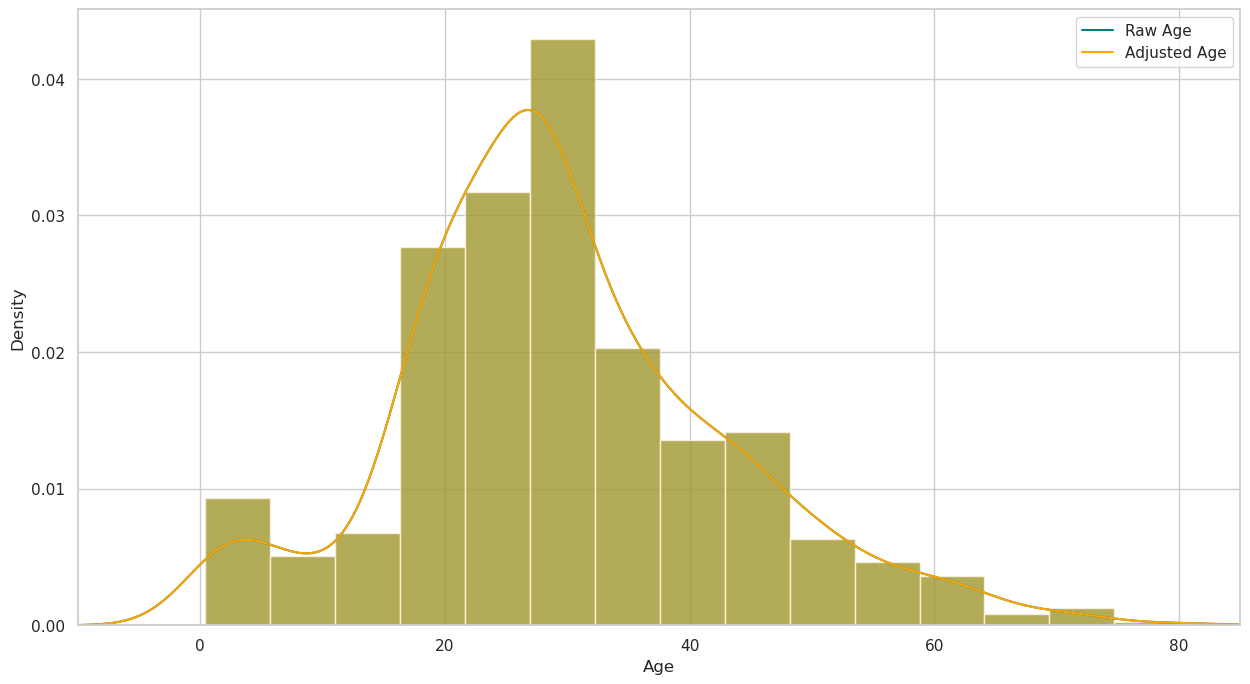

In [10]:
# Plot a histogram and density plot of the 'Age' variable after filling missing values
plt.figure(figsize=(15,8))
ax = train["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train["Age"].plot(kind='density', color='teal')
ax = train["Age"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
train["Age"].plot(kind='density', color='orange')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

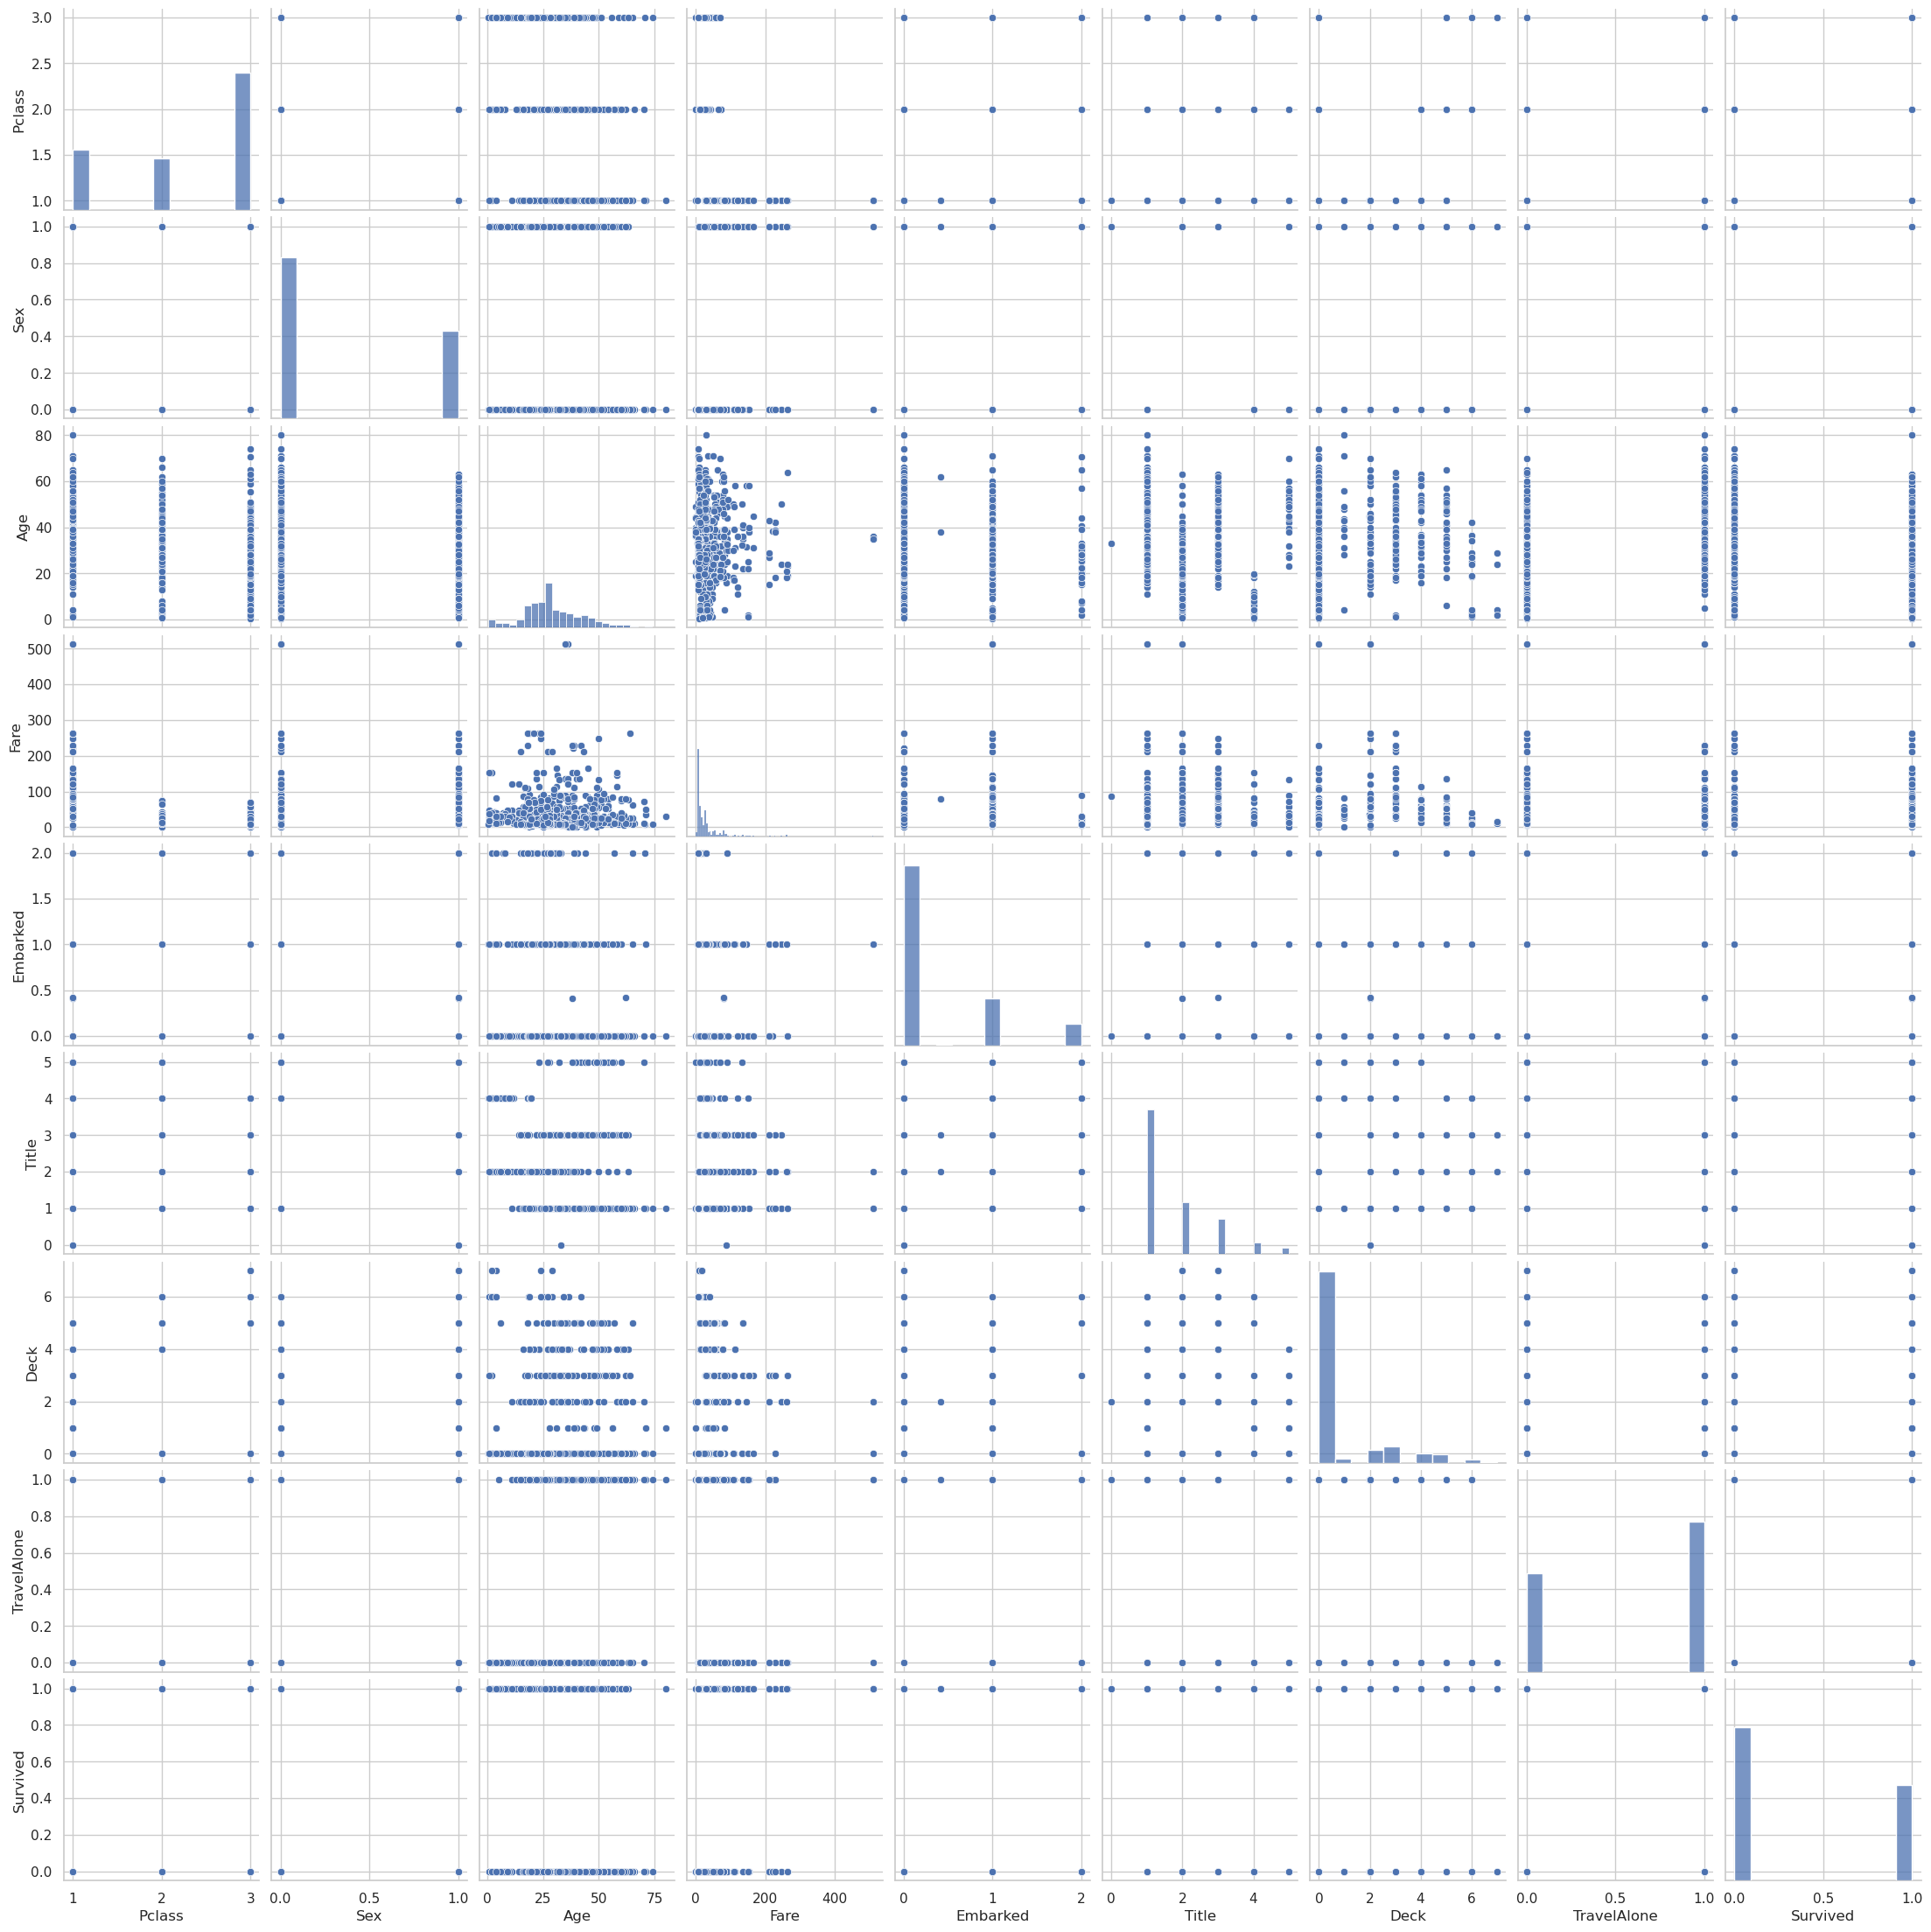

In [11]:
# Plot pairwise relationships between variables in the train data
sns.pairplot(train)

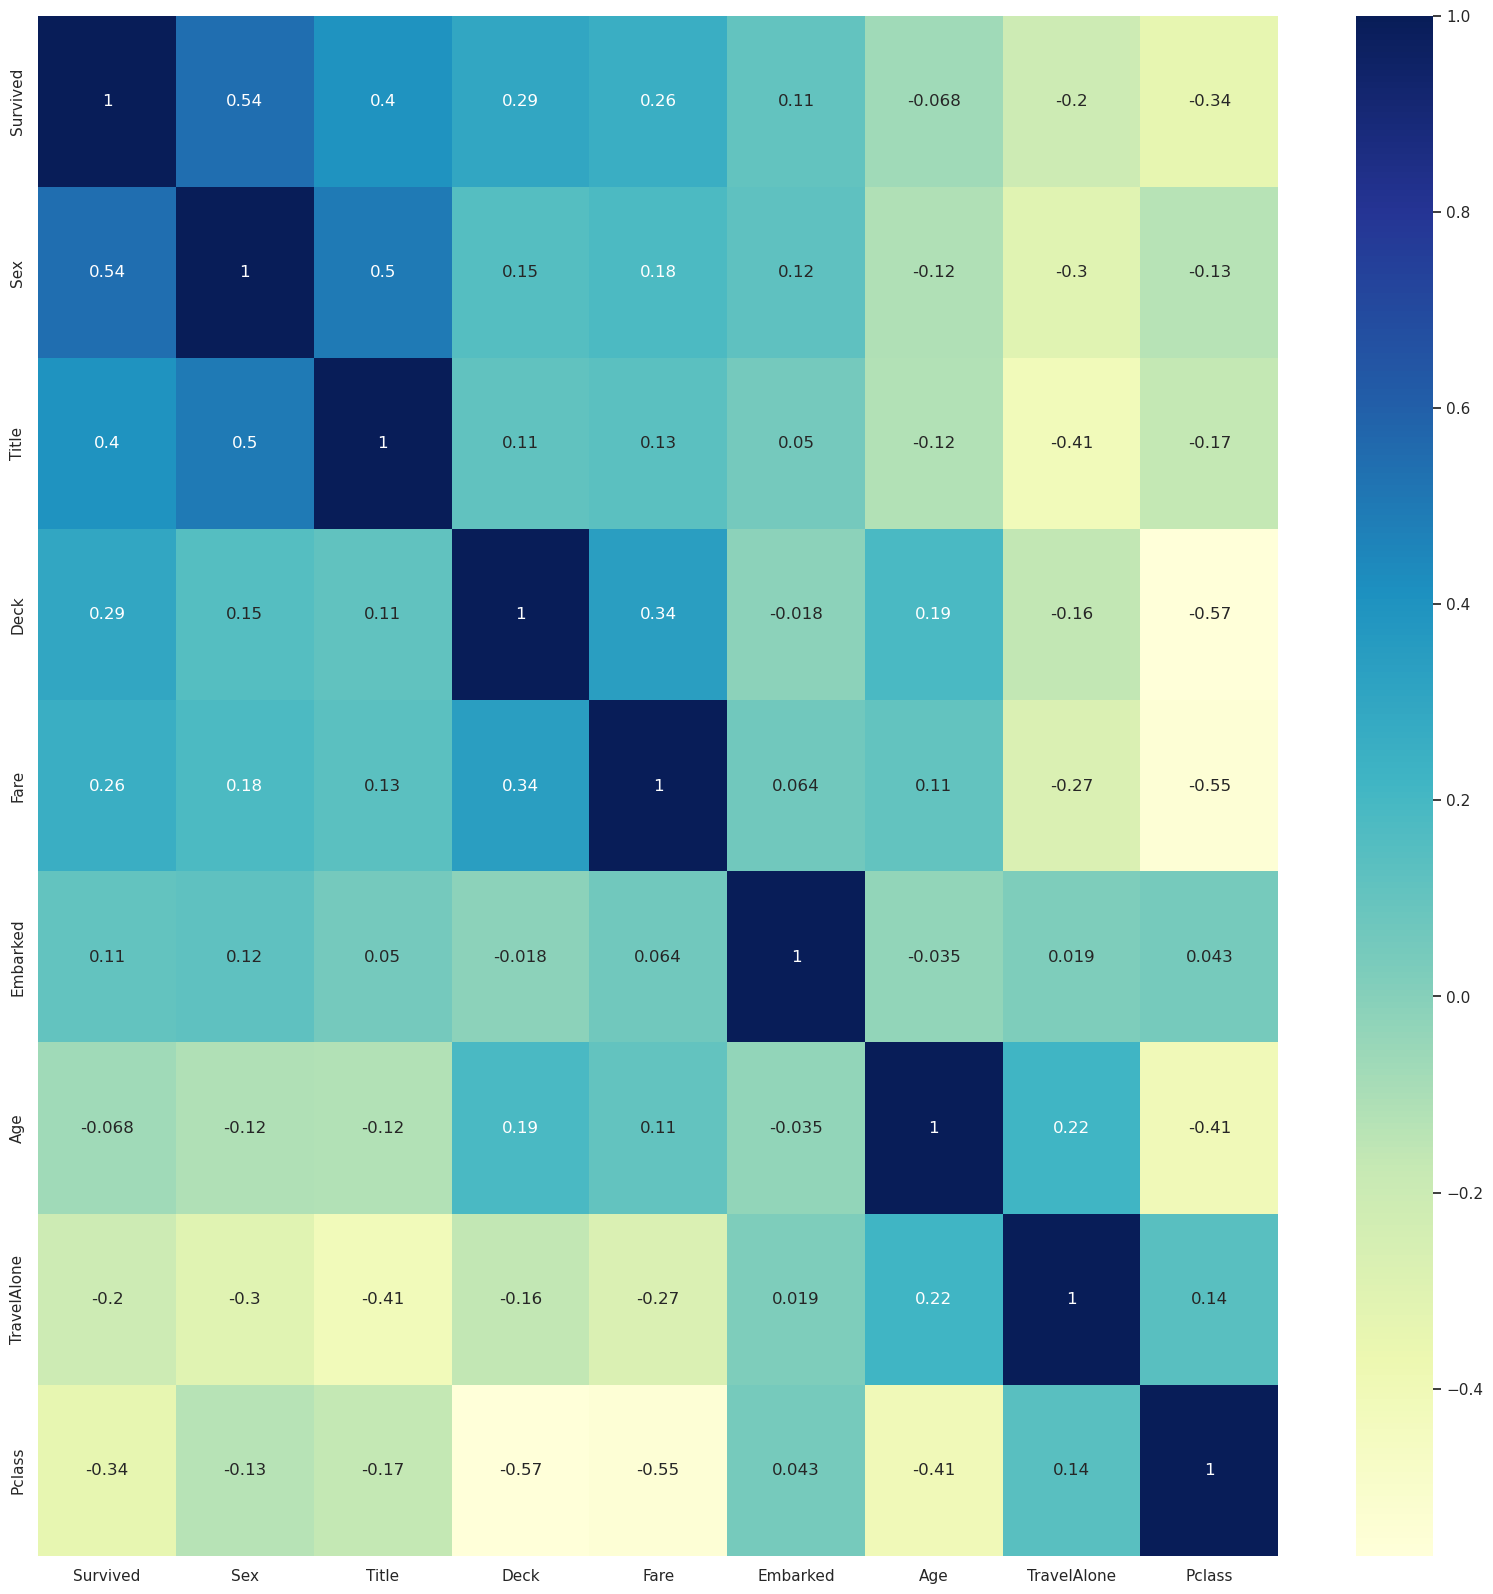

In [12]:
# Correlation analysis
corr = train.corr()

corr_organizado_Selling = corr['Survived'].sort_values(ascending=False)
cols = corr_organizado_Selling.index.tolist()

plt.figure(figsize=(20,20))
sns.heatmap(train[cols].corr(), annot=True, cmap='YlGnBu')
plt.show()

#### 2.1.1. Feature engineering and data preprocessing for test dataset
This code creates a new column called "TravelAlone" in the train dataframe, which indicates whether a passenger is traveling alone or not based on the "SibSp" and "Parch" columns. If the sum of these columns is greater than 0, the passenger is not traveling alone and the value of the "TravelAlone" column is set to 0. If the sum is 0, the passenger is traveling alone and the value of the "TravelAlone" column is set to 1.

In [13]:
# Check for missing values in the test data
test.isnull().sum()

Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Title          0
Deck           0
TravelAlone    0
dtype: int64

In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       418 non-null    float64
 1   Sex          418 non-null    float64
 2   Age          418 non-null    float64
 3   Fare         418 non-null    float64
 4   Embarked     418 non-null    float64
 5   Title        418 non-null    float64
 6   Deck         418 non-null    float64
 7   TravelAlone  418 non-null    float64
dtypes: float64(8)
memory usage: 26.2 KB


This code updates the test data in a number of ways. First, missing values in the "Age" column are filled in with the median age from the train data. The "Cabin" column is dropped, as it will not be used in the analysis. The "Embarked" column is filled in with the mode value from the test data. The "Sex" column is converted to a binary variable (1 for female, 0 for male), and the "Embarked" column is converted to numerical values (0, 1, or 2). A new column called "TravelAlone" is created, which indicates whether a passenger is traveling alone or not based on the "SibSp" and "Parch" columns. Finally, missing values in the "Fare" column are filled in with the median fare from the train data.

## 3.Exploratory Data Analysis

### 3.1. Exploration of Age

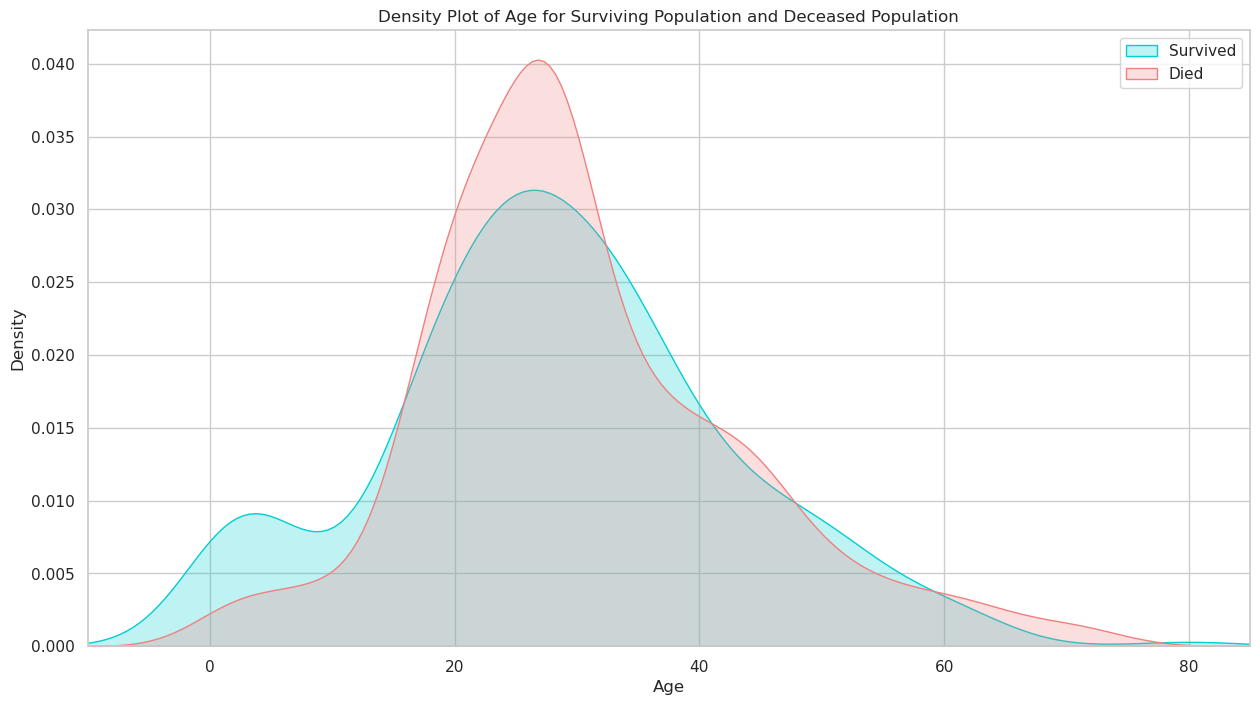

In [15]:
# Create a density plot of age for surviving and deceased population
plt.figure(figsize=(15,8))
ax = sns.kdeplot(train["Age"][train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(train["Age"][train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

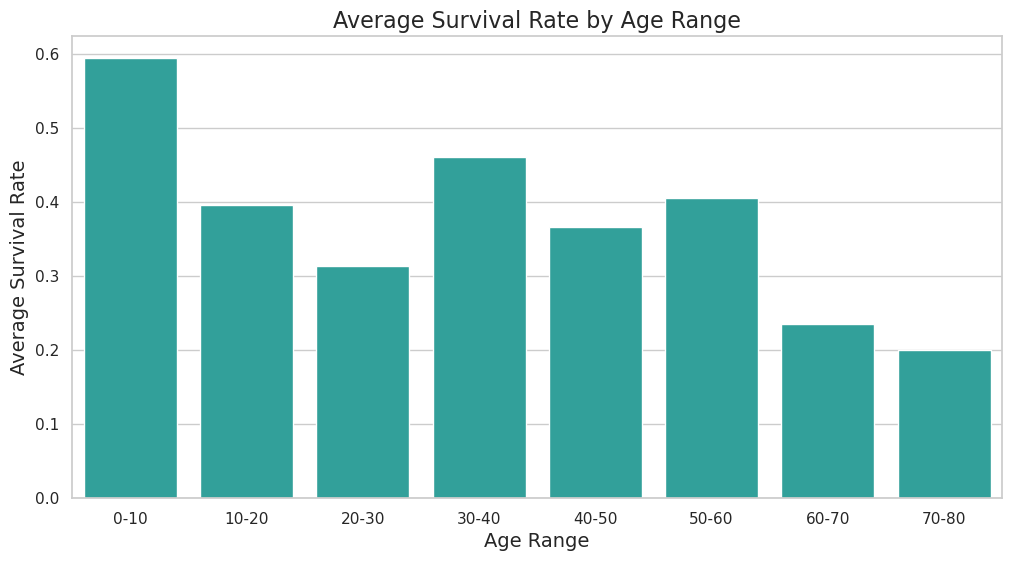

In [16]:
# Create a new column "AgeRange" with age ranges
train_age = train.copy()
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
train_age['AgeRange'] = pd.cut(train_age['Age'], bins=bins, labels=labels)

# Get the average survival rate for each age range
avg_survival_byage = train_age[["AgeRange", "Survived"]].groupby(['AgeRange'], as_index=False).mean()

# Create a bar plot of the average survival rate for each age range
plt.figure(figsize=(12,6))
g = sns.barplot(x='AgeRange', y='Survived', data=avg_survival_byage, color='LightSeaGreen')
g.set_title('Average Survival Rate by Age Range', fontsize=16)
g.set_xlabel('Age Range', fontsize=14)
g.set_ylabel('Average Survival Rate', fontsize=14)
plt.show()

### 3.2. Exploration of Fare

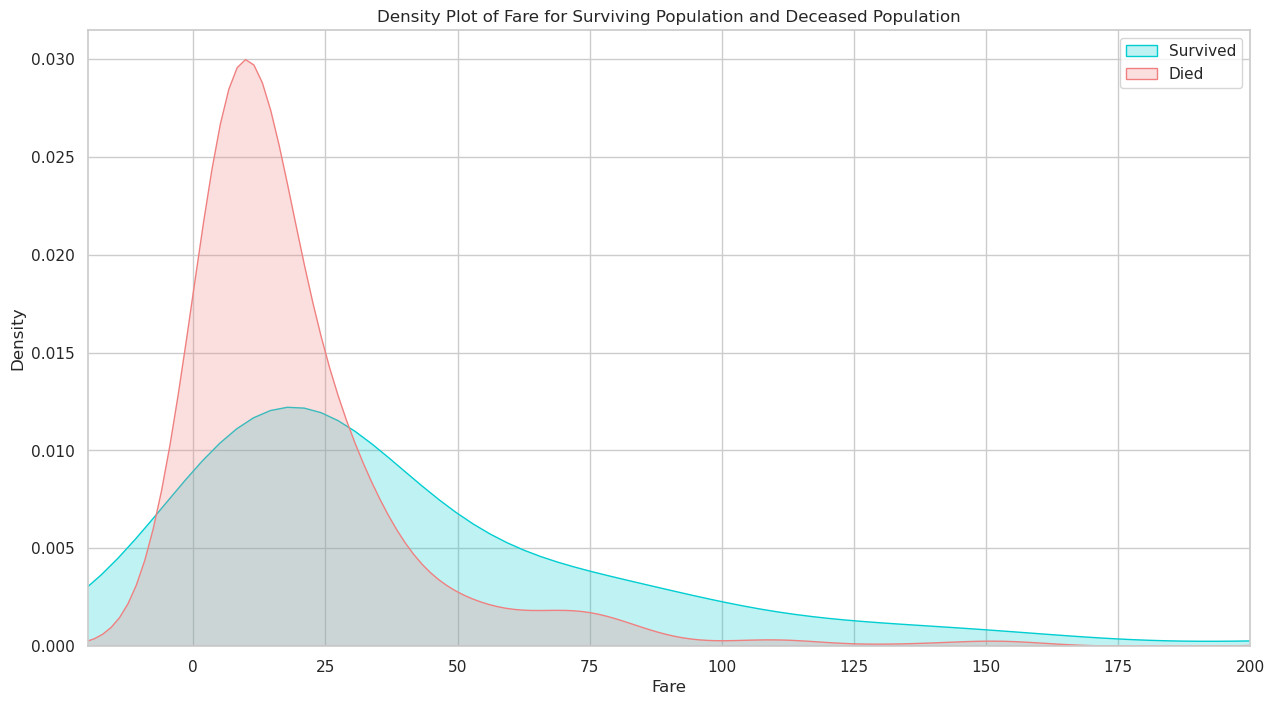

In [17]:
# Create a density plot of fare for surviving and deceased population
plt.figure(figsize=(15,8))
ax = sns.kdeplot(train['Fare'][train.Survived == 1], color='darkturquoise', shade=True)
sns.kdeplot(train['Fare'][train.Survived == 0], color='lightcoral', shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

### 3.3. Exploration of Passenger Class

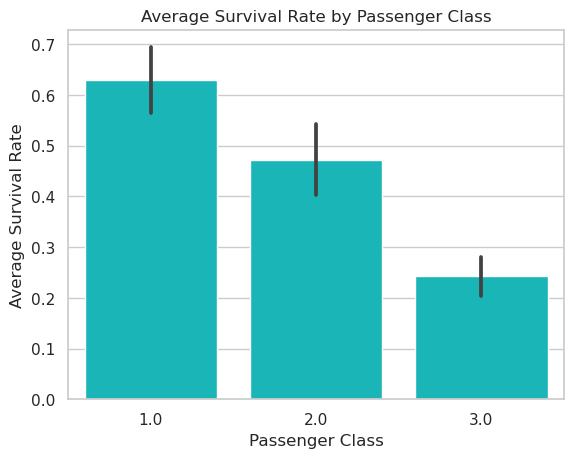

In [18]:
# Create a bar plot of average survival rate by passenger class
sns.barplot(x='Pclass', y='Survived', data=train, color="darkturquoise")
plt.title('Average Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Average Survival Rate')
plt.show()

### 3.4. Exploration of Embarked Port

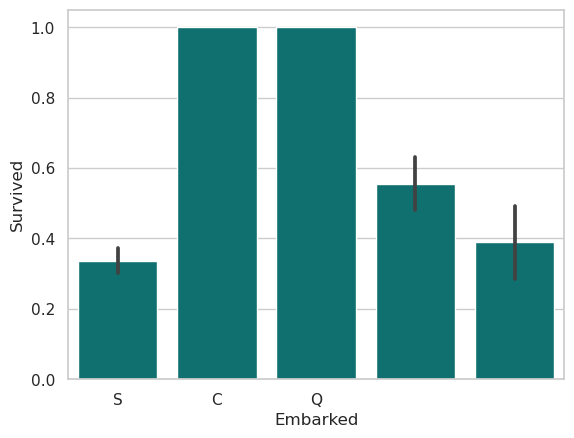

In [19]:
# Create a bar plot of survival rate by port of embarkation
sns.barplot(x='Embarked', y='Survived', data=train, color="teal")
plt.xlabel('Embarked')
plt.ylabel('Survived')
plt.xticks([0, 1, 2], ['S', 'C', 'Q'])
plt.show()

### 3.5. Exploration of Traveling Alone vs. With Family

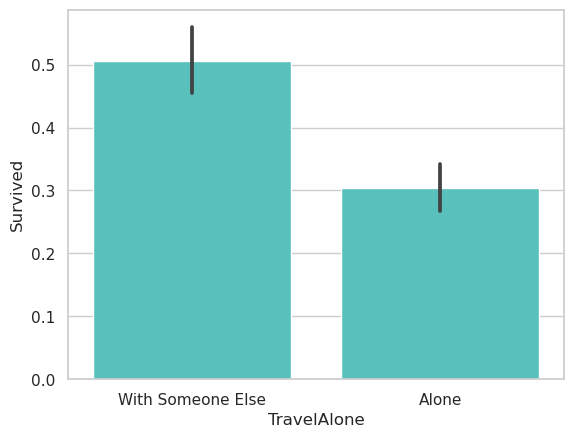

In [20]:
# Create a bar plot of survival rate by traveling alone or with someone else
sns.barplot(x='TravelAlone', y='Survived', data=train, color="mediumturquoise")
plt.xlabel('TravelAlone')
plt.ylabel('Survived')
plt.xticks([0, 1], ['With Someone Else', 'Alone'])
plt.show()

### 3.6. Exploration of Gender Variable

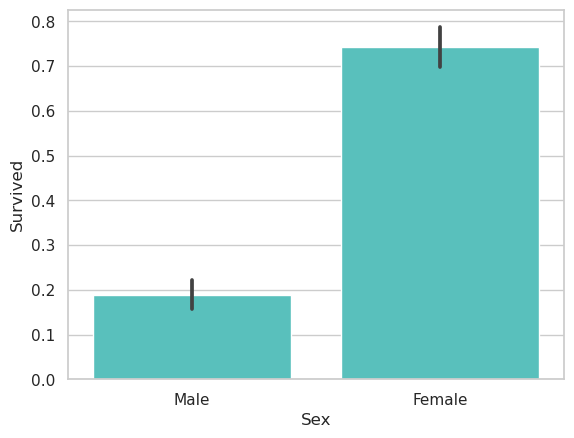

In [21]:
# Create a bar plot of survival rate by gender
sns.barplot(x='Sex', y='Survived', data=train, color="mediumturquoise")
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

## 4. Logistic Regression and Model Evaluation Results

In [22]:
# Split data into training and testing sets
X = train.drop(columns='Survived')
y = train['Survived']

In [23]:
# Scale training and testing data
scaler = StandardScaler()
X = scaler.fit_transform(X)
test = scaler.transform(test)

In [24]:
# Define the model and its respective parameter grid
model_param = {
    'DecisionTreeClassifier':{
        'model':DecisionTreeClassifier(),
        'param':{
            'criterion': ['gini','entropy']
        }
    },
        'KNeighborsClassifier':{
        'model':KNeighborsClassifier(),
        'param':{
            'n_neighbors': [5,10,15,20,25]
        }
    },
        'SVC':{
        'model':SVC(),
        'param':{
            'kernel':['rbf','linear','sigmoid'],
            'C': [0.1, 1, 10, 100]
         
        }
    }
}

scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })
df_model_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_model_score

,model,best_score,best_params
0,DecisionTreeClassifier,0.784527,{'criterion': 'gini'}
1,KNeighborsClassifier,0.817092,{'n_neighbors': 5}
2,SVC,0.814833,"{'C': 100, 'kernel': 'rbf'}"


In [25]:
best_model = KNeighborsClassifier(n_neighbors=5)
best_model.fit(X, y)

KNeighborsClassifier()

## From Predictions to Pickles: Saving and Using Your Model for Future Predictions

In [26]:
y_pred1 = best_model.predict(test)
y_pred1 = y_pred1.astype(int)

test1 = pd.read_csv('/kaggle/input/titanic/test.csv')
predictions_df = pd.DataFrame({'PassengerId': test1['PassengerId'], 'Survived': y_pred1})

predictions_df.to_csv('predictions.csv', index=False)

In [27]:
# Save the model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

Congratulations, you've made it to the end of our machine learning journey! So, what's next? We'll use our trained logistic regression model to make predictions on the test data and submit our results.

After predicting the survival outcomes of the test data, we create a DataFrame with the passenger IDs and corresponding predictions, and save it as a CSV file. This is our submission file for the competition.

But, what about our trained model? Can we use it for future predictions without having to retrain the model every time? Yes, we can! We save our trained model as a pickle file, which can be loaded later for making predictions on new data.

So, whether it's predicting the survival outcomes of passengers on a new ship or predicting the likelihood of rain on a sunny day, our trained logistic regression model has got us covered. From predictions to pickles, we can now use our model to make accurate predictions on new data.